In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
hours_texas = "data/hours_texas.csv"

In [2]:
csv_path = os.path.join("data", "reduced_texas_df.csv")

print(csv_path)



data\reduced_texas_df.csv


In [3]:
texas_df = pd.read_csv(csv_path, encoding="utf-8")
texas_df.head()

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Description,City,State,...,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,261002,201.0,2,11/30/2016 16:03,11/30/2016 17:20,30.336502,-97.755646,Accident on RM-2222 Northland Dr at Mo Pac Exp...,Austin,TX,...,11/30/2016 15:51,66.0,10.0,5.8,NaN,Clear,Day,Day,Day,Day
1,261003,201.0,2,11/30/2016 16:32,11/30/2016 17:47,30.328165,-97.694305,Accident on Grand Canyon Dr between Westheimer...,Austin,TX,...,11/30/2016 16:51,62.1,10.0,4.6,NaN,Clear,Day,Day,Day,Day
2,261004,201.0,2,11/30/2016 16:31,11/30/2016 17:46,30.326077,-97.692307,Accident on Saint Johns Ave at Cameron Rd.,Austin,TX,...,11/30/2016 16:51,62.1,10.0,4.6,NaN,Clear,Day,Day,Day,Day
3,261005,201.0,2,11/30/2016 16:06,11/30/2016 17:27,32.856014,-97.513084,#2 lane blocked and right hand shoulder blocke...,Fort Worth,TX,...,11/30/2016 16:00,NaN,NaN,NaN,NaN,NaN,Day,Day,Day,Day
4,261006,201.0,3,11/30/2016 16:35,11/30/2016 17:49,32.797668,-97.212090,#2 lane blocked and right hand shoulder blocke...,Fort Worth,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,Day,Day,Day,Day


In [4]:
#CONVERTING THE START TIME COLUMN TO "DATETIME" FORMAT.
texas_df['Start_Time'] = pd.to_datetime(texas_df['Start_Time'], errors='coerce')

In [5]:
#PULLING OUT JUST THE HOURS OF THE START TIME COLUMN SINCE BINS ONLY USE WHOLE NUMBERS.
hour_texas_df = texas_df['Start_Time'].dt.hour


hour_texas_df.head()

0    16.0
1    16.0
2    16.0
3    16.0
4    16.0
Name: Start_Time, dtype: float64

In [6]:
#CREATED 4 HOUR BLOCKS OF TIME FOR THE BINS.
bins = [0, 4, 8, 12, 16, 20, 24]

hour_groups = ["Midnight to 4am", "4am to 8am", "8am to Noon", "Noon to 4pm","4pm to 8pm", "8pm to Midnight"]


In [7]:
#CUTTING THE BIN TO MAKE A COLUMN OF DATA.
pd.cut(hour_texas_df, bins, labels=hour_groups).head()

0    Noon to 4pm
1    Noon to 4pm
2    Noon to 4pm
3    Noon to 4pm
4    Noon to 4pm
Name: Start_Time, dtype: category
Categories (6, object): ['Midnight to 4am' < '4am to 8am' < '8am to Noon' < 'Noon to 4pm' < '4pm to 8pm' < '8pm to Midnight']

In [8]:
#CREATED A COLUMN TO STORE PREVIOUS MADE COLUMN FROM THE BINS.
texas_df["Hour Group"] = pd.cut(hour_texas_df, bins, labels=hour_groups)
texas_df.head()

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Description,City,State,...,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour Group
0,261002,201.0,2,2016-11-30 16:03:00,11/30/2016 17:20,30.336502,-97.755646,Accident on RM-2222 Northland Dr at Mo Pac Exp...,Austin,TX,...,66.0,10.0,5.8,NaN,Clear,Day,Day,Day,Day,Noon to 4pm
1,261003,201.0,2,2016-11-30 16:32:00,11/30/2016 17:47,30.328165,-97.694305,Accident on Grand Canyon Dr between Westheimer...,Austin,TX,...,62.1,10.0,4.6,NaN,Clear,Day,Day,Day,Day,Noon to 4pm
2,261004,201.0,2,2016-11-30 16:31:00,11/30/2016 17:46,30.326077,-97.692307,Accident on Saint Johns Ave at Cameron Rd.,Austin,TX,...,62.1,10.0,4.6,NaN,Clear,Day,Day,Day,Day,Noon to 4pm
3,261005,201.0,2,2016-11-30 16:06:00,11/30/2016 17:27,32.856014,-97.513084,#2 lane blocked and right hand shoulder blocke...,Fort Worth,TX,...,NaN,NaN,NaN,NaN,NaN,Day,Day,Day,Day,Noon to 4pm
4,261006,201.0,3,2016-11-30 16:35:00,11/30/2016 17:49,32.797668,-97.212090,#2 lane blocked and right hand shoulder blocke...,Fort Worth,TX,...,NaN,NaN,NaN,NaN,NaN,Day,Day,Day,Day,Noon to 4pm


In [9]:
#DROP COLUMNS THAT ARE NOT NEED TO ANALYZE AND WRTIE CONCULSION. 

texas_df.drop(columns=["TMC", "Description", "Wind_Speed(mph)", "Precipitation(in)", "Start_Lat", "Start_Lng", "Zipcode", "Weather_Timestamp", "Temperature(F)"])


,ID,Severity,Start_Time,End_Time,City,State,Visibility(mi),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour Group
0,261002,2,2016-11-30 16:03:00,11/30/2016 17:20,Austin,TX,10.0,Clear,Day,Day,Day,Day,Noon to 4pm
1,261003,2,2016-11-30 16:32:00,11/30/2016 17:47,Austin,TX,10.0,Clear,Day,Day,Day,Day,Noon to 4pm
2,261004,2,2016-11-30 16:31:00,11/30/2016 17:46,Austin,TX,10.0,Clear,Day,Day,Day,Day,Noon to 4pm
3,261005,2,2016-11-30 16:06:00,11/30/2016 17:27,Fort Worth,TX,NaN,NaN,Day,Day,Day,Day,Noon to 4pm
4,261006,3,2016-11-30 16:35:00,11/30/2016 17:49,Fort Worth,TX,NaN,NaN,Day,Day,Day,Day,Noon to 4pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376440,4232273,2,2019-08-23 13:16:00,8/23/2019 13:45,Houston,TX,1.0,Heavy T-Storm,Day,Day,Day,Day,Noon to 4pm
376441,4232274,3,2019-08-23 13:04:00,8/23/2019 13:33,Houston,TX,0.5,Heavy T-Storm,Day,Day,Day,Day,Noon to 4pm
376442,4232275,3,2019-08-23 13:00:00,8/23/2019 13:30,Houston,TX,0.5,Heavy T-Storm,Day,Day,Day,Day,Noon to 4pm
376443,4232277,3,2019-08-23 16:44:00,8/23/2019 17:11,Humble,TX,10.0,Mostly Cloudy,Day,Day,Day,Day,Noon to 4pm


In [10]:
texas_df.to_csv(hours_texas)

In [11]:
texas_df["Hour Group"].value_counts()

4am to 8am         98683
8am to Noon        88538
Noon to 4pm        79150
4pm to 8pm         74193
8pm to Midnight    19139
Midnight to 4am    13309
Name: Hour Group, dtype: int64

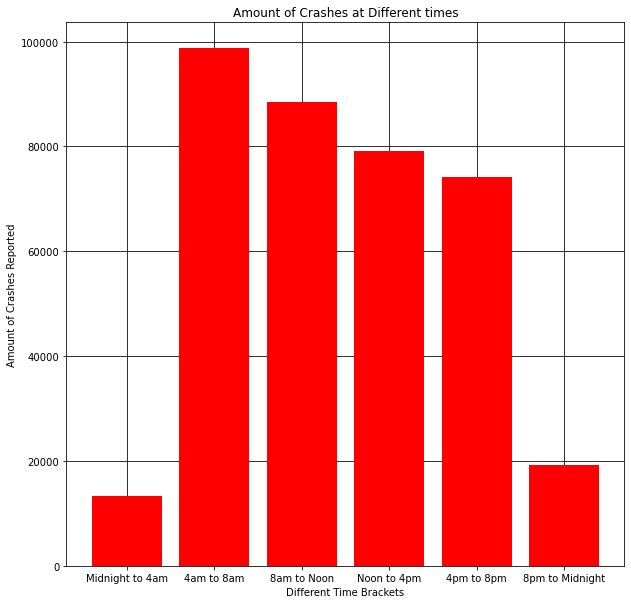

In [13]:
hour_groups = ["Midnight to 4am", "4am to 8am", "8am to Noon", "Noon to 4pm","4pm to 8pm", "8pm to Midnight"]

hour_nums = [13309, 98683, 88538, 79150, 74193, 19139]
plt.figure(figsize=(10,10))
plt.grid(zorder=0, color="black")
plt.bar(hour_groups, hour_nums, color="r", align="center", zorder=3)
plt.title("Amount of Crashes at Different times")
plt.xlabel("Different Time Brackets")
plt.ylabel("Amount of Crashes Reported")
plt.ylim(0, max(hour_nums)+5000)
plt.savefig("data/BarPlot.png")

In [ ]:
#I was assigned to look at the time of the accidents and see which time block has the most accidents. 
#My hypothesis was that the early morning to morning time blocks would have the most accidents. 
#I started with convert the "Start_Time" column of the orignal CSV file to "Datetime" format so pandas could read the data better.
#After converting the column I then pulled just the hour of the starting time so I could make bins for the time blocks.
#I needed whole numbers of the time to make the bins. I then procced to set the bin to "Start_Time" to get the value counts.
#I used the time blocks bins and the values of each one to create a barplot to compare the time blocks.
#My hypothesis was wrong, most of the accidents occured during the morning to day blocks in this data set. 

